# Temat

Opisz działanie testu pierwszości Millera-Rabina i zaimplementuj go. W przypadku, gdy
ten test zwróci <b>FALSE</b> mamy pewność, że dana liczba jest złożona - wyjaśnij dlaczego.
Przedstaw działanie testu Millera-Rabina na losowo wygenerowanych liczbach nie mniejszych
od 105
(wykorzystaj wbudowaną funkcję do generowania liczb pseudolosowych). Wykonaj
ten test tyle razy, by prawdopodobieństwo błędu było mniejsze od 10−6
. Przykłady wykonaj
za pomocą programu SageMath. Część informacji na ten temat znajdziesz w rozdziale 2.4
książki https://wstein.org/ent/ent.pdf


In [464]:
DEFAULT_MIN_NUMBER = 105
DEFAULT_PROBABILITY = 10^-6

## Czym jest test Millera-Rabina?

## Implementacjia w SageMath'ie

In [465]:
def miller_rabin_test(n, k=5):
    if n < 2:
        return False
    if n in [2, 3]:
        return True
    if n % 2 == 0:
        return False

    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1

    for _ in range(k):
        a = randint(2, n - 2)
        x = power_mod(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = power_mod(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True


## Test Losowej liczby

In [466]:
NUMBER = randint(DEFAULT_MIN_NUMBER, 10^6)
TEST = 10

print("Liczba:", NUMBER)
print("Testy:", TEST)

wynik = miller_rabin_test(NUMBER, TEST)
print("Wynik:", wynik)

Liczba: 6812
Testy: 10
Wynik: False


### Obliczenie prawdopodobieństwa

In [467]:
def probability_of_miller_rabin_test(liczba, testy):
  factors = [a for a, _ in factor(liczba)]
  factors_size = len(factors)
  probability = factors_size/((liczba - 2)**testy)
  return probability

In [468]:
def test_to_satisfy_probability(liczba, probability):
  factors = [a for a, _ in factor(liczba)]
  factors_size = len(factors)
  if probability <= 0 or liczba <= 2:
    raise ValueError("invalid liczba or probability")
  else: 
    tests = log(factors_size/probability) / log(liczba - 2)
  return ceil(N(tests))


In [469]:
probability = probability_of_miller_rabin_test(NUMBER, TEST)
print(probability)
print(f"Less then {DEFAULT_PROBABILITY}:", probability < 10^-6)

1/71507215091667598819986182670000000000
Less then 1/1000000: True


In [470]:
tests = test_to_satisfy_probability(NUMBER, DEFAULT_PROBABILITY)
print(tests)

2


### Liczby Pierwsze w przedziale według millera rabina

In [471]:
import sys

def progress_bar(current, total, bar_length=40):
    percent = float(current) / float(total)
    done = int(bar_length * percent)
    sys.stdout.write('\r[{}{}] {:.1f}%'.format(
        '=' * done, ' ' * (bar_length - done), percent * 100))
    sys.stdout.flush()
    if current == total:
        print()

In [472]:
BOUND = (2, 10^3)
TESTS = 10^3

T = []
print("Bound:", BOUND)
print("Testy:", TESTS)
for i in range(BOUND[0], BOUND[1]):
  if(miller_rabin_test(i , TESTS)):
    T.append(i)
  progress_bar(i - BOUND[0] + 1, BOUND[1] - BOUND[0])

print("Wyniki: ", T)

Bound: (2, 1000)
Testy: 1000
[========================================] 100.0%
Wyniki:  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


### Wykres ilości testów względem liczby testowanej

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

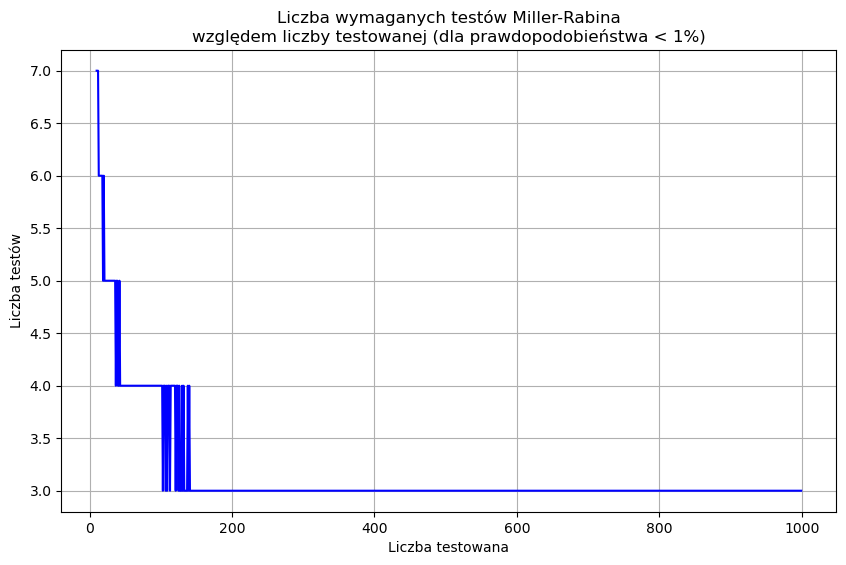

In [474]:
import matplotlib.pyplot as plt
BOUND = (10, 10**3)
PROBABILITY = DEFAULT_PROBABILITY

x_vals = []
y_vals = []
for i in range(BOUND[0], BOUND[1]):
  if(i > 2):
    x_vals.append(i)
    y_vals.append(test_to_satisfy_probability(i, PROBABILITY))

print(x_vals, y_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, linestyle='-', color='blue')
plt.title("Liczba wymaganych testów Miller-Rabina\nwzględem liczby testowanej (dla prawdopodobieństwa < 1%)")
plt.xlabel("Liczba testowana")
plt.ylabel("Liczba testów")
plt.grid(True)
plt.show()